
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 1.10
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,200.83,56.00,15.62,-3.66,6.24,30.75,15.51,22.65,6.24,0.23
1,AXP,American Express,US Stocks:Financials,99.47,44.48,-1.59,15.00,21.45,37.26,20.08,29.51,21.45,0.69
2,AMGN,Amgen,US Stocks:Healthcare,4.59,8.93,7.03,14.51,13.88,20.15,13.62,23.78,13.88,0.54
3,AAPL,Apple Inc.,US Stocks:Technology,82.20,84.64,70.76,53.72,43.71,31.36,17.31,33.46,43.71,1.27
4,BA,Boeing,US Stocks:Industrials,34.19,94.89,-38.10,-12.44,14.73,30.92,16.90,49.53,14.73,0.28
5,CAT,Caterpillar Inc.,US Stocks:Industrials,35.02,83.34,49.30,13.65,28.97,25.61,14.53,26.56,28.97,1.05
6,CVX,Chevron Corporation,US Stocks:Energy,12.74,95.45,-12.09,-2.01,6.71,31.81,21.35,32.30,6.71,0.17
7,CSCO,Cisco Systems,US Stocks:Technology,62.80,141.56,-0.47,10.14,19.63,21.22,10.59,26.37,19.63,0.70
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,-13.44,-18.24,-13.92,8.30,6.18,15.76,10.41,18.52,6.18,0.27
9,GS,Goldman Sachs,US Stocks:Financials,52.10,310.53,31.78,9.38,17.47,28.11,15.46,33.78,17.47,0.48


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
18,MSFT,Microsoft,US Stocks:Technology,275.10,54.44,33.05,43.90,40.11,23.77,11.06,18.36,40.11,2.12
3,AAPL,Apple Inc.,US Stocks:Technology,82.20,84.64,70.76,53.72,43.71,31.36,17.31,33.46,43.71,1.27
27,WMT,Walmart,US Stocks:Consumer Discretionary,-22.91,3.15,26.98,15.23,19.68,18.07,12.20,15.32,19.68,1.21
23,UNH,UnitedHealth Group,US Stocks:Healthcare,-61.18,-16.47,16.54,17.29,26.54,21.06,14.75,23.37,26.54,1.09
25,V,Visa Inc.,US Stocks:Financials,-30.87,-10.69,1.85,22.72,25.60,29.69,17.86,22.94,25.60,1.07
5,CAT,Caterpillar Inc.,US Stocks:Industrials,35.02,83.34,49.30,13.65,28.97,25.61,14.53,26.56,28.97,1.05
21,CRM,Salesforce,US Stocks:Technology,165.07,-30.52,25.18,31.53,32.79,18.47,6.45,32.58,32.79,0.97
10,HD,The Home Depot,US Stocks:Consumer Discretionary,38.49,16.06,18.05,18.25,22.42,23.65,14.64,21.94,22.42,0.97
19,NKE,Nike,US Stocks:Consumer Discretionary,-31.65,50.17,43.79,32.99,22.04,28.20,12.41,24.12,22.04,0.87
15,JPM,JPMorgan Chase,US Stocks:Financials,14.93,109.65,4.96,12.35,23.40,22.62,12.01,27.26,23.40,0.82


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MSFT,AAPL,WMT,UNH,V,CAT,CRM,HD,NKE,JPM,...,PG,CSCO,AXP,HON,MRK,JNJ,RF,EHC,INTC,Ranked Portfolio
Annual Returns,40.11,43.71,19.68,26.54,25.60,28.97,32.79,22.42,22.04,23.40,...,12.45,19.63,21.45,18.07,12.10,13.36,24.41,22.34,18.44,23.17
Std Dev,18.36,33.46,15.32,23.37,22.94,26.56,32.58,21.94,24.12,27.26,...,15.55,26.37,29.51,24.88,16.83,18.86,36.26,33.13,27.54,22.97
Sharpe Ratio,2.12,1.27,1.21,1.09,1.07,1.05,0.97,0.97,0.87,0.82,...,0.73,0.70,0.69,0.68,0.65,0.65,0.64,0.64,0.63,0.96
Weight,0.06,0.06,0.06,0.04,0.03,0.06,0.06,0.06,0.06,0.03,...,0.06,0.06,0.03,0.06,0.04,0.04,0.03,0.04,0.06,1.00
Worst Typical Down Year,3.39,-23.21,-10.96,-20.20,-20.28,-24.15,-32.37,-21.46,-26.20,-31.12,...,-18.65,-33.11,-37.57,-31.69,-21.56,-24.36,-48.11,-43.92,-36.64,-22.77
Black Swan,-14.97,-56.67,-26.28,-43.57,-43.22,-50.71,-64.95,-43.40,-50.32,-58.38,...,-34.20,-59.48,-67.08,-56.57,-38.39,-43.22,-84.37,-77.05,-64.18,-45.74


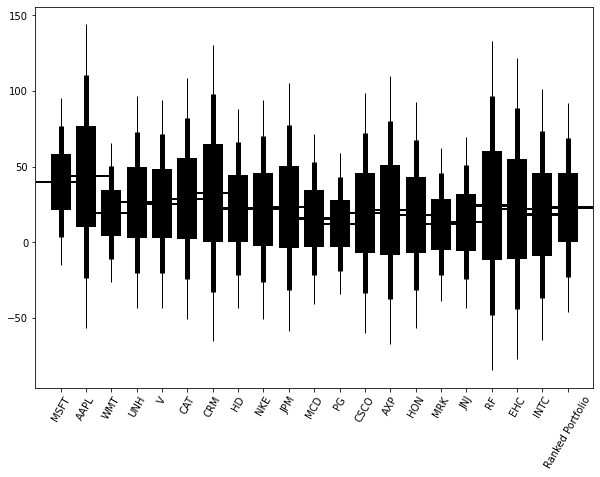

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

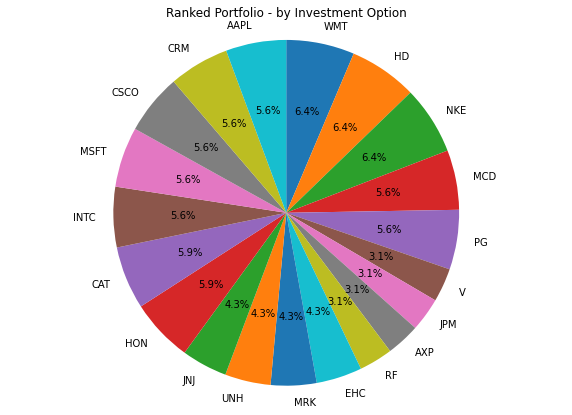

WMT    0.03
HD     0.06
NKE    0.06
MCD    0.06
PG     0.06
V      0.06
JPM    0.06
AXP    0.04
RF     0.03
EHC    0.06
MRK    0.04
UNH    0.06
JNJ    0.06
HON    0.06
CAT    0.06
INTC   0.04
MSFT   0.03
CSCO   0.06
CRM    0.04
AAPL   0.03



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MSFT                           0.0564
    AAPL                           0.0564
    WMT                            0.0638
    UNH                            0.0428
    V                              0.0315
    CAT                            0.0589
    CRM                            0.0564
    HD                             0.0638
    NKE                            0.0638
    JPM                            0.0315
    MCD                            0.0558
    PG                             0.0558
    CSCO                           0.0564
    AXP                            0.0315
    HON                            0.0589
    MRK                            0.0428
    JNJ                            0.0428
    RF                             0.0315
    EHC                            0.0428
    INTC                           0.0564


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.....

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.14
    annual_return              25.56
    std_dev                    21.53
    worst typical down year   -17.50
    black_swan                -39.04


Ranked Portfolio Weights:
    MSFT                           0.1400
    AAPL                           0.0600
    WMT                            0.1500
    UNH                            0.0400
    V                              0.1500
    CAT                            0.0000
    CRM                            0.0600
    HD                             0.0000
    NKE                            0.1000
    JPM                            0.0000
    MCD                            0.0900
    PG                             0.0000
    CSCO                           0.0000
    AXP                            0.0000
    HON                            0.0000
    MRK                            0.0000
    JNJ                            0.0700
    RF      

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).